In [1]:

import torch
import torch.nn as nn
import numpy as np

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split


In [2]:

## !pip install scikit-learn
## !pip install numpy
## !pip install pandas
## !pip install matplotlib


In [3]:

civs_path = 'data/imgs.new.CIVS'


In [4]:

path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths   = paths_subset[rand_idxs]

print(n_images)


5016


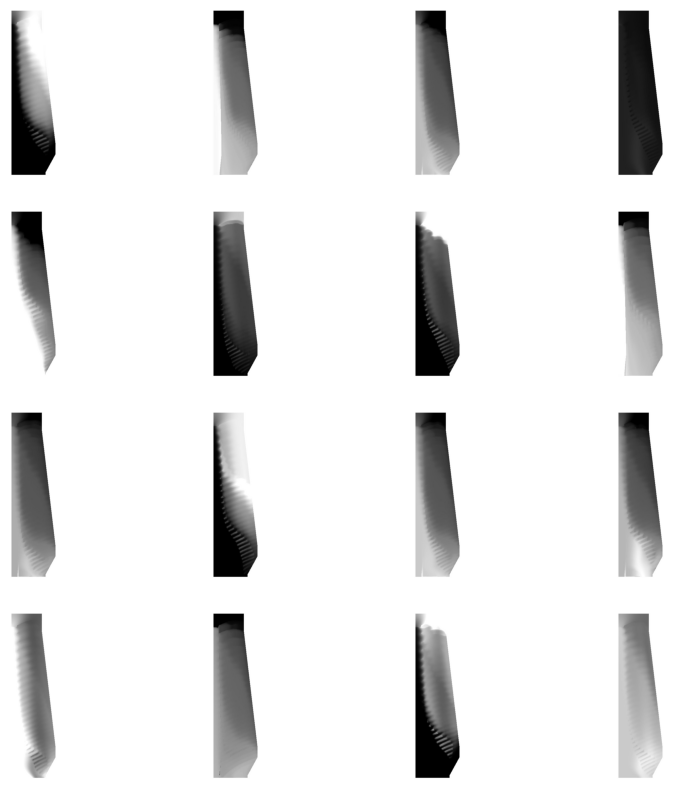

In [5]:

_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")


In [6]:
## data/imgs.new.CIVS/h2_Ng90_Pci0_H0_Wp0_Ph300_Ox27_Ow3.0_Hbt1410_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2o_Ng0_Pci150_H0_Wp0_Ph300_Ox24_Ow6_Hbt1459.8_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2_Ng40_Pci60_H0_Wp0_Ph300_Ox23_Ow5_Hbt1459.8_Wm12.2_Wr308750.4.jpg

    
## ['tg', 'Ng0', 'Pci175', 'H0', 'Wp0', 'Ph300', 'Ox24', 'Ow7', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']
    

In [7]:

'''

['tg',  'Ng120', 'Pci0', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow3.0', 'Hbt1485', 'Wm12.2', 'Wr308750.4']
['h2o', 'Ng70', 'Pci0', 'H0', 'Wp0', 'Ph500', 'Ox24', 'Ow5.0', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']
['co2', 'Ng50', 'Pci200', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow4', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']


'''



"\n\n['tg',  'Ng120', 'Pci0', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow3.0', 'Hbt1485', 'Wm12.2', 'Wr308750.4']\n['h2o', 'Ng70', 'Pci0', 'H0', 'Wp0', 'Ph500', 'Ox24', 'Ow5.0', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']\n['co2', 'Ng50', 'Pci200', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow4', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']\n\n\n"

In [8]:



def label_func2(fname):
    ## print(fname)
    fname = fname.replace("data/imgs.new.CIVS/","")
    temp_name = fname.replace(".jpg", "").split("_")
    ## print(temp_name)
    
  
    y0 = temp_name[0]                              ## tg
    y1 = float(temp_name[1].replace("Ng", ""))     ## 'Ng0'
    y2 = float(temp_name[2].replace("Pci", ""))    ## 'Pci175'
    y3 = float(temp_name[3].replace("H", ""))     ## 'H0'
    y4 = float(temp_name[4].replace("Wp", ""))     ## 'Wp0'
    y5 = float(temp_name[5].replace("Ph", ""))     ## 'Ph300'
    y6 = float(temp_name[6].replace("Ox", ""))    ## 'Ox24'
    y7 = float(temp_name[7].replace("Ow", ""))     ## 'Ow7
    y8 = float(temp_name[8].replace("Hbt", ""))    ## 'Hbt1459.8'
    y9 = float(temp_name[9].replace("Wm", ""))    ## 'Wm12.2'
    y10 = float(temp_name[10].replace("Wr", ""))    ## 'Wr308750.4'
    
 
    ## np.array([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10 ])
    return [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10 ]



In [9]:

## 1400, 390
## x 0.2
## 280 , 78


list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    ##print(img_name)
    
    my_img = Image.open(img_name)
    
    my_img = my_img.resize((80, 280))
    ## my_img = ImageOps.grayscale(my_img)
 

    img_np = np.array(my_img)

    ## img_np = img_np.reshape(-1)
    
    temp_label_vector_rc = label_func2(img_name)
    if temp_label_vector_rc[0] == "tg":
    
        ## print(img_np.shape)
        list_imgs.append(img_np)
    
        ## conditions_labels_regression = label_func2(img_name)
        ## list_label_vectors.append( 0 ) 
        list_label_vectors.append( temp_label_vector_rc )


In [10]:

## X = np.array( list_imgs)
## y = np.array( list_label_vectors )
## print(X.shape)
## print(y.shape)

X =  list_imgs
y =  list_label_vectors 



In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


668
168
668
168


In [12]:
X_train[7].shape

(280, 80, 3)



## Dataset class


In [13]:

class MnistDataset(Dataset):
    
   
    def __init__(self):
     
        self.labels          = []
        self.tensor_imgs     = []
        self.one_hot_classes = []
        self.img_size_1d     = 21840
        self.n_samples       = 0
        self.noise_size      = 1000
        

    def plot_image(self, index):
        img = self.tensor_imgs[index]   ##.reshape(280, 78)
        print(img.shape)
        label = str( self.labels[index] )
        ## img = img.astype(float)
      
        return img, label
    
    


In [14]:

mnist_dataset = MnistDataset()


In [15]:


mnist_dataset.n_samples = len( X_train )

mnist_dataset.n_samples




668

In [16]:

for index in range(mnist_dataset.n_samples):
    
    # image target (label)
    reg_vals = y_train[index]
    target = torch.zeros( (10) )
    
    target[ 0 ] = reg_vals[1]
    target[ 1 ] = reg_vals[2]
    target[ 2 ] = reg_vals[3]
    target[ 3 ] = reg_vals[4]
    target[ 4 ] = reg_vals[5]
    target[ 5 ] = reg_vals[6]
    target[ 6 ] = reg_vals[7]
    target[ 7 ] = reg_vals[8]
    target[ 8 ] = reg_vals[9]
    target[ 9 ] = reg_vals[10]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
        
    mnist_dataset.labels.append(          reg_vals            )
    mnist_dataset.tensor_imgs.append(      image_values       )
    mnist_dataset.one_hot_classes.append(  target             )





In [17]:

print( len( mnist_dataset.labels           ))
print( len( mnist_dataset.tensor_imgs      ))
print( len( mnist_dataset.one_hot_classes  ))


668
668
668


In [18]:

img, the_reg_values = mnist_dataset.plot_image(45)


torch.Size([1, 3, 280, 80])


In [19]:
the_reg_values

"['tg', 0.0, 70.0, 0.0, 0.0, 300.0, 30.0, 3.0, 1459.8, 12.2, 308750.4]"

torch.Size([3, 280, 80])
torch.Size([280, 80, 3])


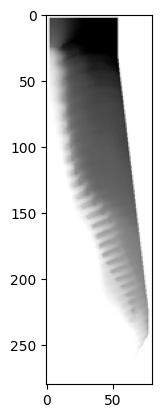

In [20]:

reshaped_img = img.squeeze(0)
print(  reshaped_img.shape  )

reshaped_img = reshaped_img.permute(1, 2, 0)  ###.view(1,3,280,78)

print(  reshaped_img.shape  )

plt.imshow(reshaped_img)
plt.show()




## Function to generate uniform random data


In [21]:

def generate_random(size):
    random_data = torch.rand(size)
    return random_data

def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data


def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data



# size here must only be an integer
def generate_random_one_hot(size):
    label_tensor = torch.rand((size))
    return label_tensor



## Resize view class

In [22]:


class View(nn.Module):
    def __init__(self, shape):
        super().__init__()
        self.shape = shape,

    def forward(self, x):
        return x.view(*self.shape)
    




## Crop


In [23]:

# crop (numpy array) image to given width and height

def crop_centre(img, new_width, new_height):
    height, width, _ = img.shape
    startx = width//2 - new_width//2
    starty = height//2 - new_height//2    
    return img[  starty:starty + new_height, startx:startx + new_width, :]




## Discriminator


In [24]:

class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
     
        self.model = nn.Sequential(
            ## nn.Linear(mnist_dataset.img_size_1d+11, 2000)
            # expect input of shape (1,3,280,78)
            nn.Conv2d(3, 256, kernel_size=8, stride=2),
            nn.BatchNorm2d(256),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            nn.Conv2d(256, 256, kernel_size=8, stride=2),
            nn.BatchNorm2d(256),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            nn.Conv2d(256, 3, kernel_size=8, stride=2),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            View(348),
            nn.Linear(348, 1),
            nn.Sigmoid()
        )
    
        # create loss function
        self.loss_function = nn.BCELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)
        

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        
      

    def forward_conditional(self, image_tensor, label_tensor):
        # combine seed and label
        inputs = torch.cat( (image_tensor, label_tensor) )
        return self.model(inputs)   

        
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)

        
    def train_conditional(self, inputs, label_tensor, targets):
        # calculate the output of the network
        outputs = self.forward(inputs, label_tensor)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
        
        if (self.counter % 100 == 0):
            print("counter = ", self.counter)
         

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 100 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
   
 
       



## Test that the discriminator can separate real data from random noise


In [25]:

print( mnist_dataset )


In [26]:

%%time

D = Discriminator()

for i in range(mnist_dataset.n_samples):
    label             = mnist_dataset.labels[i]
    image_data_tensor = mnist_dataset.tensor_imgs[i]
    target_tensor     = mnist_dataset.one_hot_classes[i]
 

    ## D.train_conditional(image_data_tensor, target_tensor, torch.FloatTensor([1.0]))
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    # fake data
    '''   
    D.train(
           generate_random_image(mnist_dataset.img_size_1d), 
           generate_random_one_hot(11), 
           torch.FloatTensor([0.0])
    )
    
    '''
    D.train(
           generate_random_image((1,3,280,80)), 
           torch.FloatTensor([0.0])
    )
 




counter =  100
counter =  200
counter =  300
counter =  400
counter =  500
counter =  600
counter =  700
counter =  800
counter =  900
counter =  1000
counter =  1100
counter =  1200
counter =  1300
CPU times: user 17min 2s, sys: 2.35 s, total: 17min 4s
Wall time: 16min 35s


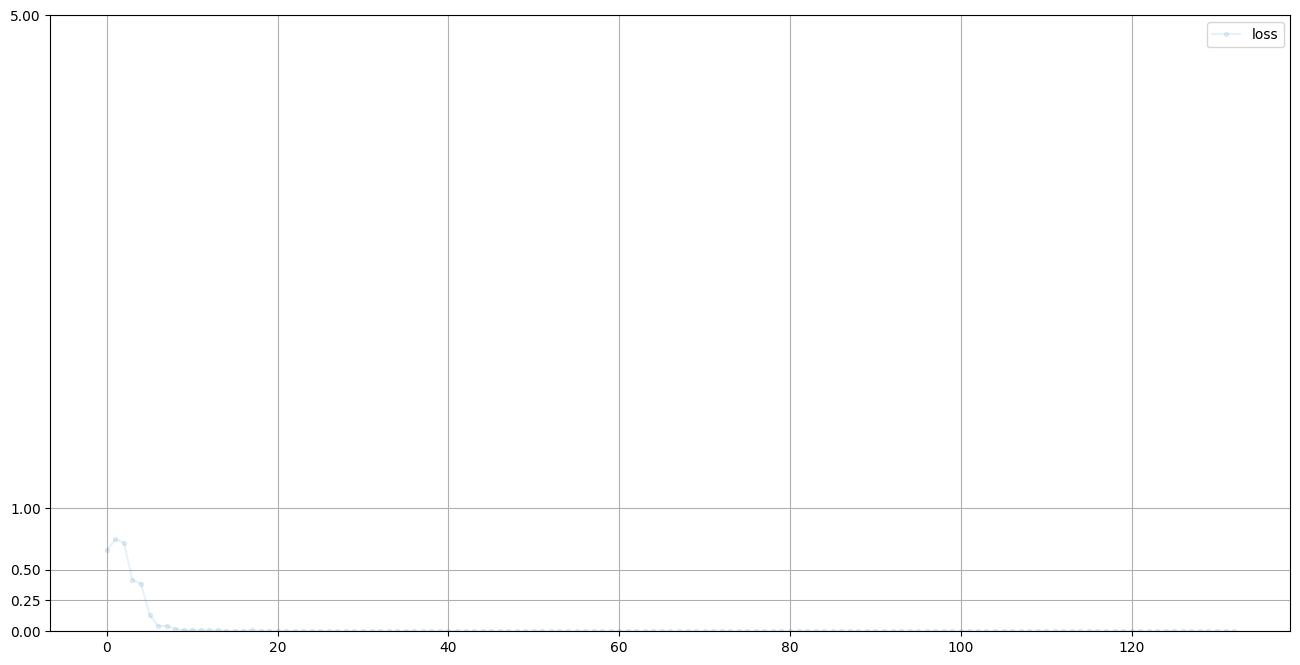

In [27]:

D.plot_progress()



## Manually run discriminator to check it can tell real data from fake


In [28]:

for i in range(4):
    index = random.randint(0,mnist_dataset.n_samples) 
    image_data_tensor = mnist_dataset.tensor_imgs [     index   ]
    target_tensor     = mnist_dataset.one_hot_classes[  index   ]

    ## print( D.forward( image_data_tensor, target_tensor ).item() )
    print( D.forward( image_data_tensor ).item() )


for i in range(4):
    ## print( D.forward( generate_random_image(mnist_dataset.img_size_1d), generate_random_one_hot(11) ).item() )
    print( D.forward( generate_random_image((1,3,280,78)) ).item() )





0.9999858140945435
0.9999792575836182
0.9999829530715942
0.9999804496765137
7.635464135091752e-05
7.551309681730345e-05
7.261372957145795e-05
6.951289105927572e-05



## My ConvTranspose2d()


In [29]:

class MyConvTranspose2d(nn.Module):
    
    def __init__(self, conv, output_size):
        super(MyConvTranspose2d, self).__init__()
        self.output_size = output_size
        self.conv = conv
        
    def forward(self, x):
        x = self.conv(x, output_size=self.output_size)
        return x



## Figuring out the convolution maths for the Generator


In [30]:

mm_tensor_test = torch.randn(1, 3, 30, 5)
mm_tensor_test.shape


torch.Size([1, 3, 30, 5])

In [31]:

mm_conv_transp_test = nn.ConvTranspose2d(3, 256, kernel_size=8, stride=2)


In [32]:

mm_res_test = mm_conv_transp_test(mm_tensor_test)

mm_res_test.shape


torch.Size([1, 256, 66, 16])

In [33]:

ll_conv_transp_test = nn.ConvTranspose2d(256, 256, kernel_size=8, stride=2)


In [34]:


ll_res_test = ll_conv_transp_test(mm_res_test)

ll_res_test.shape


torch.Size([1, 256, 138, 38])

In [35]:

ss_conv_transp_test = nn.ConvTranspose2d(256, 3, kernel_size=8, stride=2, padding=1)


In [36]:


ss_out = ss_conv_transp_test(ll_res_test)



In [38]:

ss_out.shape


torch.Size([1, 3, 280, 80])

In [39]:

3 * 280 * 80


67200

In [42]:
vv_view = View(  (1, 3, 280, 80)  )

In [43]:

vv_res = vv_view(ss_out)


In [45]:

vv_res.shape


torch.Size([1, 3, 280, 80])


## Generator Network


In [48]:

class Generator(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        self.model = nn.Sequential(
            ## nn.Linear(mnist_dataset.noise_size+11, 2000)
            # input is a 1d array
            nn.Linear(100, 450),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
           
            # reshape to 4d
            View((1, 3, 30, 5)),
            
   
            nn.ConvTranspose2d(3, 256, kernel_size=8, stride=2),
            nn.BatchNorm2d(256),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            
            nn.ConvTranspose2d(256, 256, kernel_size=8, stride=2),
            nn.BatchNorm2d(256),
            #nn.LeakyReLU(0.2),
            nn.GELU(),

            nn.ConvTranspose2d(256, 3, kernel_size=8, stride=2, padding=1),
            nn.BatchNorm2d(3),
            
            
            ## View(43200),
            ## nn.Linear(43200, 65520),
            # output should be (1,3,128,128) ## (1, 3, 280, 80)
            
            nn.Sigmoid()
            ## View(  (1, 3, 280, 80)  )
        )
        
 
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)

        # counter and accumulator for progress
        self.counter  = 0;
        self.progress = []
        

        
    def forward_conditional(self, seed_tensor, label_tensor):        
        # combine seed and label
        inputs = torch.cat( (seed_tensor, label_tensor) )
        return self.model(inputs)

        
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train_conditional(self, D, inputs, label_tensor, targets):
        # calculate the output of the network
        g_output = self.forward(inputs, label_tensor)
        
        # pass onto Discriminator
        d_output = D.forward(g_output, label_tensor)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
         

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        
        
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

  
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        

    
        
    def plot_images(self, label):
        label_tensor = torch.zeros((10))
        label_tensor[label] = 1.0
        # plot a 3 column, 2 row array of sample images
        f, axarr = plt.subplots(2,3, figsize=(16,8))
        for i in range(2):
            for j in range(3):
                axarr[i,j].imshow(
                            G.forward(
                            generate_random_seed(100), 
                            label_tensor
                            ).detach().cpu().numpy().reshape(28,28), interpolation='none', cmap='Blues'
                )
        

        

        


## Check the generator output is of the right type and shape


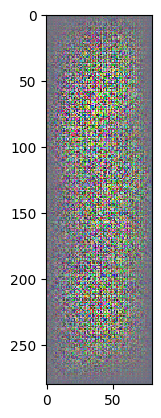

In [49]:

G = Generator()


## output = G.forward(generate_random_seed(mnist_dataset.noise_size), generate_random_one_hot(11))
output = G.forward(generate_random_seed(100))


img = output.detach().permute(0,2,3,1).view(280,80,3).numpy()


plt.imshow(img, interpolation='none', cmap='Blues')





## Train GAN

create Discriminator and Generator

train Discriminator and Generator


In [50]:

D = Discriminator()
G = Generator()


In [51]:


epochs = 2   ## 12

for epoch in range(epochs):
    print(epoch)
    print("epoch = ", epoch + 1)

    for i in range(mnist_dataset.n_samples):
        print(i)
    
        label             = mnist_dataset.labels[i]
        image_data_tensor = mnist_dataset.tensor_imgs[i]
        target_tensor     = mnist_dataset.one_hot_classes[i]
    
        
        # train discriminator on true
        ## D.train(image_data_tensor, target_tensor, torch.FloatTensor([1.0]) )
    
        D.train(image_data_tensor, torch.FloatTensor([1.0]))
    
        # random 1-hot label for generator
        ## random_label = generate_random_one_hot(1)
    
        # train discriminator on false
        # use detach() so gradients in G are not calculated

        '''
        D.train( G.forward(  
                           generate_random_seed(mnist_dataset.noise_size), 
                           random_label
                      ).detach(),                 # use detach() so gradients in G are not calculated
             random_label, 
             torch.FloatTensor( [0.0] )
           )
        '''
    
        D.train(G.forward(generate_random_seed(100)).detach(), torch.FloatTensor([0.0]))
    
        ## random_label = generate_random_one_hot(11)
    
        ## G.train(D, generate_random_seed(mnist_dataset.noise_size), random_label, torch.FloatTensor([1.0]))
        G.train(D, generate_random_seed(100), torch.FloatTensor([1.0]))
    
        print(i)
    
  


0
epoch =  1
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
counter =  100
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
counter =  200
99
100
100
101
101
102
102
103
103
104
104
105
105
106
106
107
107
108
108
109
109
110
110
111
111
112
112
113
113
114
114
115
115
116
116
117
117
118
118
119
119
120
120
121
121
122
122
123
123
124
124
125
125
126
126
127
127
128
128
129
129
130
130
131
131
132
132
133
133
134
134
135
135
136
136
137
137
138
138
139
139
140
140
141
141
142
142
143
143
144
144
145
145
146
146
1

369
370
370
371
371
372
372
373
373
374
374
375
375
376
376
377
377
378
378
379
379
380
380
381
counter =  2100
381
382
382
383
383
384
384
385
385
386
386
387
387
388
388
389
389
390
390
391
391
392
392
393
393
394
394
395
395
396
396
397
397
398
398
399
399
400
400
401
401
402
402
403
403
404
404
405
405
406
406
407
407
408
408
409
409
410
410
411
411
412
412
413
413
414
414
415
415
416
416
417
417
418
418
419
419
420
420
421
421
422
422
423
423
424
424
425
425
426
426
427
427
428
428
429
429
430
430
431
counter =  2200
431
432
432
433
433
434
434
435
435
436
436
437
437
438
438
439
439
440
440
441
441
442
442
443
443
444
444
445
445
446
446
447
447
448
448
449
449
450
450
451
451
452
452
453
453
454
454
455
455
456
456
457
457
458
458
459
459
460
460
461
461
462
462
463
463
464
464
465
465
466
466
467
467
468
468
469
469
470
470
471
471
472
472
473
473
474
474
475
475
476
476
477
477
478
478
479
479
480
480
481
counter =  2300
481
482
482
483
483
484
484
485
485
486
486
487
487
488



## Plot discriminator error

for the discriminator, we want the loss values to be around 0.25 for a balanced discriminator and generator, there the discriminator is not confident at telling real images from generated images. if the loss values fall towards zero, it suggests the generator has not learned to fool the discriminator.


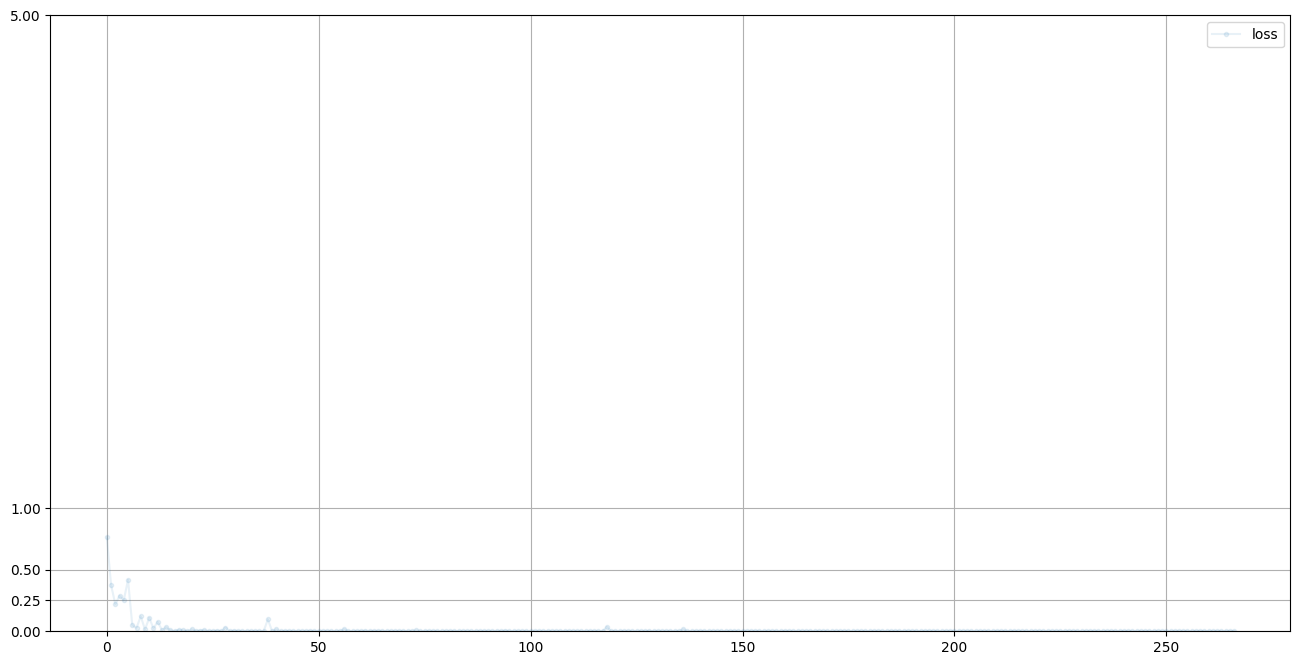

In [52]:

D.plot_progress()



## Plot generator error


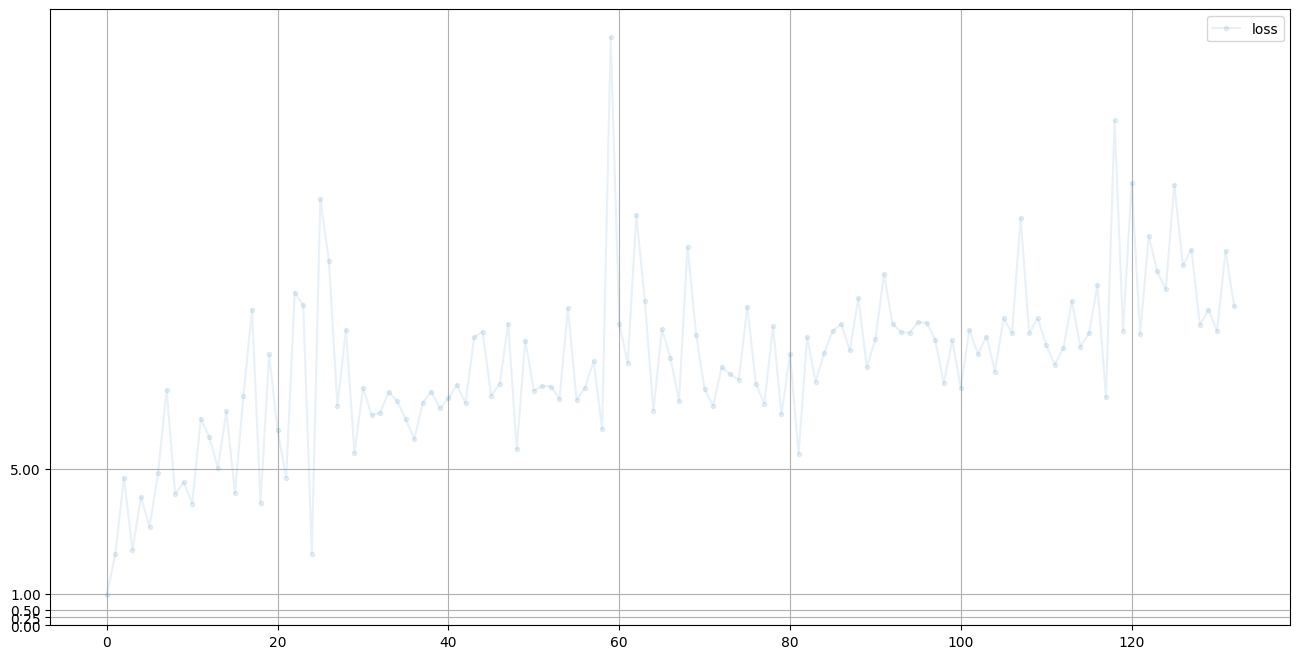

In [53]:

G.plot_progress()


## Random trained generation

* plot a 3 column, 2 row array of generated images



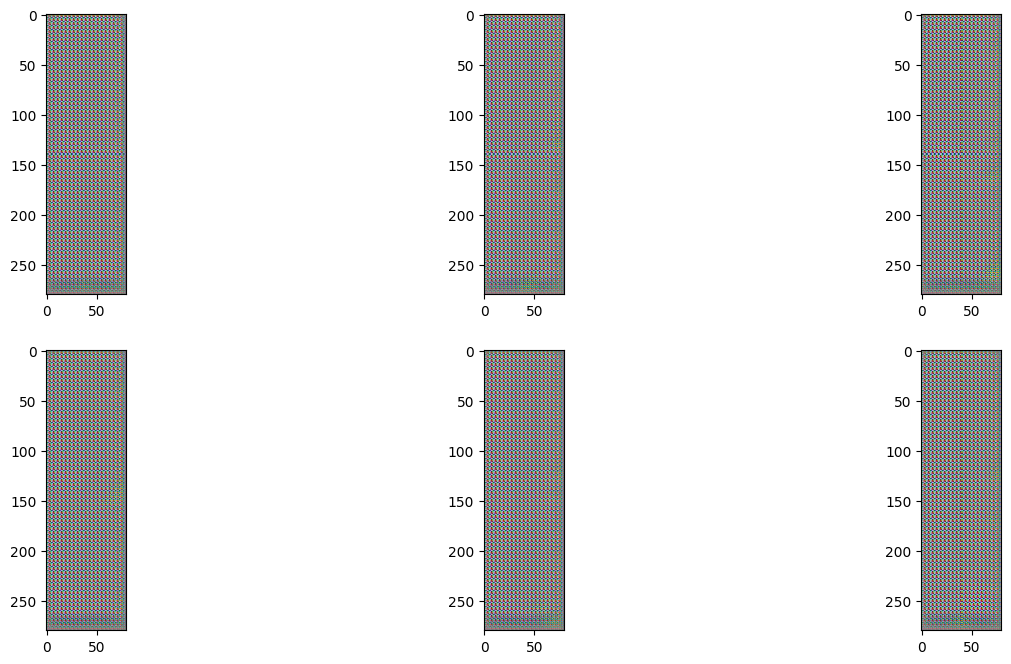

In [54]:



f, axarr = plt.subplots(2,3, figsize=(16,8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().permute(0,2,3,1).view(280,80,3).cpu().numpy()
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
 




## Run Generator after training

plot several outputs from the trained generator

plot a 3 column, 2 row array of generated images


In [ ]:

## data/imgs.new.CIVS/h2_Ng90_Pci0_H0_Wp0_Ph300_Ox27_Ow3.0_Hbt1410_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2o_Ng0_Pci150_H0_Wp0_Ph300_Ox24_Ow6_Hbt1459.8_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2_Ng40_Pci60_H0_Wp0_Ph300_Ox23_Ow5_Hbt1459.8_Wm12.2_Wr308750.4.jpg




In [ ]:



target = torch.zeros( (11) )

    
target[ 0 ] = 0.0
target[ 1 ] = 37.9
target[ 2 ] = 0.0
target[ 3 ] = 0.0
target[ 4 ] = 0.0
target[ 5 ] = 400.0
target[ 6 ] = 24.0
target[ 7 ] = 5.0
target[ 8 ] = 1459.8
target[ 9 ] = 12.2
target[ 10 ] = 308750.4
        

        
f, axarr = plt.subplots(2,3, figsize=(16,8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(mnist_dataset.noise_size), target)
        img = output.detach().numpy().reshape(280,78)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')

      

